# 一个标准的pytorch的工作流

1. 准备数据
2. 建立or选择 **预训练模型**（选择损失函数和优化器、建立训练loop）
3. 训练数据 （让模型在数据中，去find pattern）
4. 测试数据 （在新数据中进行预测，make prediction）
5. 保存新模型

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.4.1+cpu'

### 1. 准备数据

将你所需的分析的数据（照片、声音。。。）转换为数字

In [2]:
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim = 1)
y = weight * X + bias

X[:10], X.shape, y[:10], y.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 torch.Size([50, 1]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 torch.Size([50, 1]))

In [3]:
# 创建train/test data split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

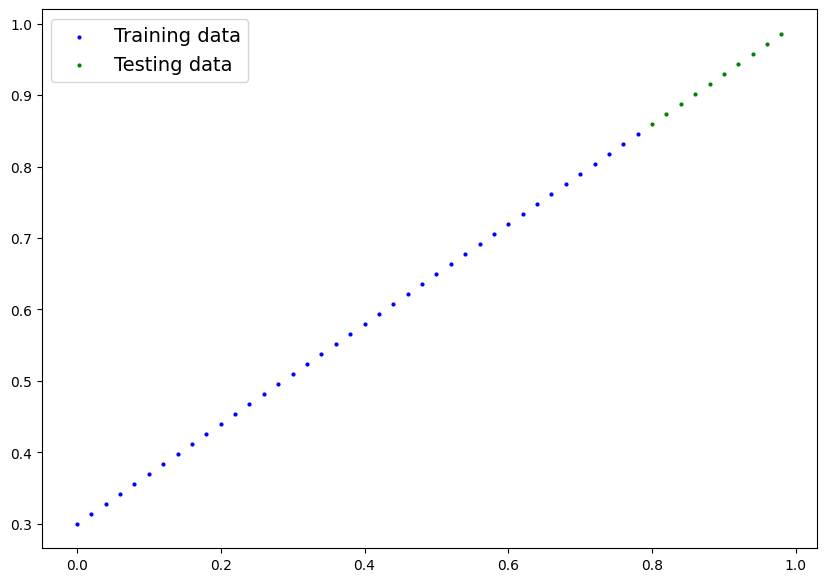

In [4]:
# 可视化视图

def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

plot_predictions();

### 2. 建立模型

建立一个线性回归模型，继承nn.Module 以及 重载forward函数

In [5]:
# 创建线性回归模型类

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights*x + self.bias

model_0.para: [Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
model_0.state_dict: OrderedDict({'weights': tensor([0.3367]), 'bias': tensor([0.1288])})


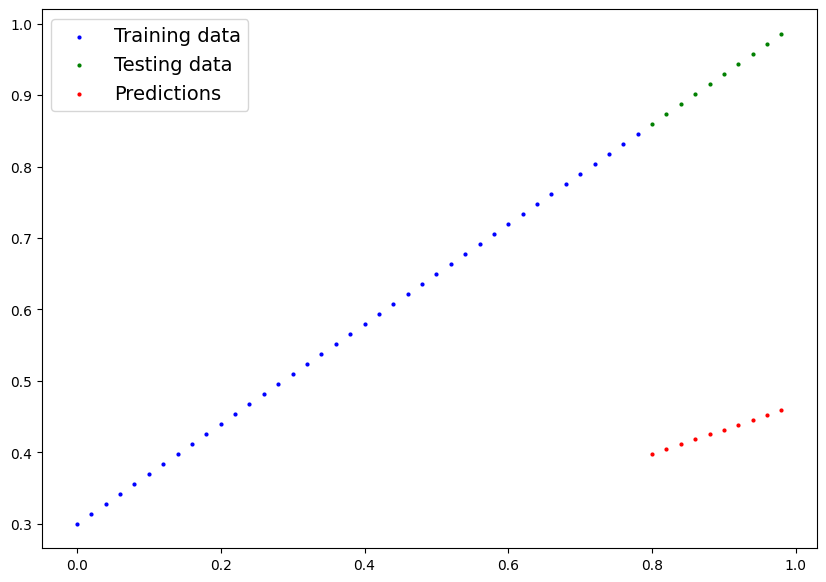

In [6]:
# 检测一下当前模型的精准度

torch.manual_seed(42)
model_0 = LinearRegressionModel()
print(f"model_0.para: {list(model_0.parameters())}")
print(f"model_0.state_dict: {model_0.state_dict()}")
### 推测也就是，make predictions
with torch.inference_mode():
    y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)

### 3. 训练模型

1. 创建损失函数、优化器
2. 创建优化循环

In [12]:
# 选择一个损失函数和优化器

loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

In [20]:
epochs = 150

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    # 进入训练模式
    model_0.train()

    # 1. 将训练数据输入模型
    # 2. 计算监督数据和模型输出的损失值
    # 3. 将优化器的梯度置零
    # 4. 反向传播损失值
    # 5. 优化器进一步
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 进入预测模式
    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test.type(torch.float))
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.0025885067880153656 | MAE Test Loss: 0.008447891101241112 
Epoch: 10 | MAE Train Loss: 0.0025885067880153656 | MAE Test Loss: 0.008447891101241112 
Epoch: 20 | MAE Train Loss: 0.0025885067880153656 | MAE Test Loss: 0.008447891101241112 
Epoch: 30 | MAE Train Loss: 0.0025885067880153656 | MAE Test Loss: 0.008447891101241112 
Epoch: 40 | MAE Train Loss: 0.0025885067880153656 | MAE Test Loss: 0.008447891101241112 
Epoch: 50 | MAE Train Loss: 0.0025885067880153656 | MAE Test Loss: 0.008447891101241112 
Epoch: 60 | MAE Train Loss: 0.0025885067880153656 | MAE Test Loss: 0.008447891101241112 
Epoch: 70 | MAE Train Loss: 0.0025885067880153656 | MAE Test Loss: 0.008447891101241112 
Epoch: 80 | MAE Train Loss: 0.0025885067880153656 | MAE Test Loss: 0.008447891101241112 
Epoch: 90 | MAE Train Loss: 0.0025885067880153656 | MAE Test Loss: 0.008447891101241112 
Epoch: 100 | MAE Train Loss: 0.0025885067880153656 | MAE Test Loss: 0.008447891101241112 
Epoch: 110 | MAE Trai

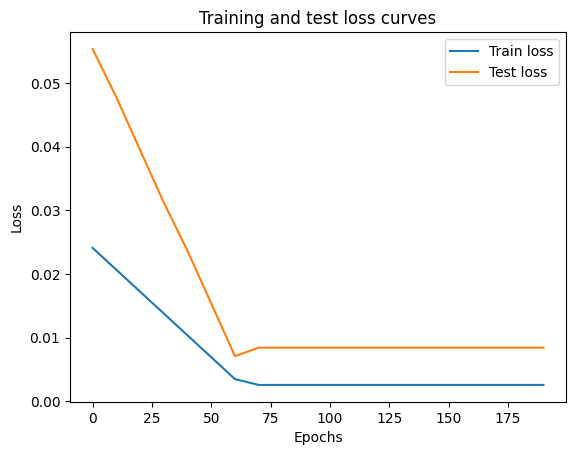

In [18]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [19]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weights': tensor([0.6951]), 'bias': tensor([0.2993])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.3
